<a href="https://colab.research.google.com/github/mcnica89/DATA6100_F23/blob/main/Regression_when_Xs_are_correlated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

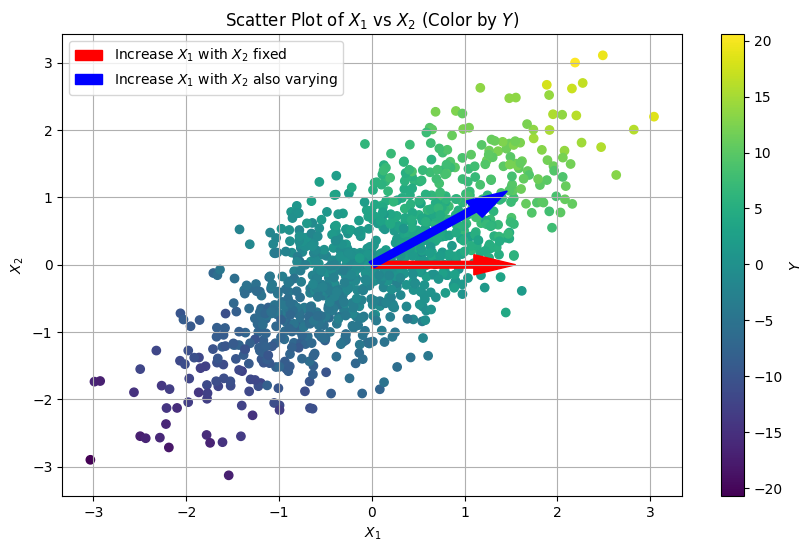

In [7]:
np.random.seed(0)

# Generate Gaussian random variables X_1 and X_2
mean = [0, 0]  # Mean of X_1 and X_2
correlation = 0.75 #correlation of X_1,X_2
cov_matrix = [[1.0,correlation], [correlation, 1.0]] #marginally each are N(0,1)
num_samples = 1000

X = np.random.multivariate_normal(mean, cov_matrix, num_samples).T
X_1 = X[0]
X_2 = X[1]

# Generate Y as a linear function of X_1 and X_2 plus noise
beta_1 = 3.0
beta_2 = 4.0
noise = np.random.normal(0, 1, num_samples)
Y = beta_1 * X_1 + beta_2 * X_2 + noise

# Create a scatter plot of X_1 vs X_2 with colors based on Y
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_1, X_2, c=Y, cmap='viridis', marker='o')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.colorbar(scatter, label='$Y$')
plt.title('Scatter Plot of $X_1$ vs $X_2$ (Color by $Y$)')
plt.grid(True)

#add arrows
arrow_size=1.1
plt.arrow(0, 0, arrow_size, 0,color="r",width=0.1,label="Increase $X_1$ with $X_2$ fixed")
plt.arrow(0, 0, arrow_size, arrow_size*correlation,color="b",width=0.1, label="Increase $X_1$ with $X_2$ also varying")
plt.legend()
plt.show()


# Linear regression with only $X_1$

In [3]:
# Perform least squares linear regression on Y vs X_1
beta_hat_1 = np.linalg.lstsq(X_1[:,np.newaxis], Y, rcond=None)[0][0]
print("--- True Setup (Secret!) ---")
print(f"  Y=beta_1*X_1 + beta_2*X_2 + noise")
print(f"  beta_1={beta_1}")
print(f"  beta_2={beta_2}")
print(f"  Corr(X_1,X_2)={correlation}")
print(f"  Num samples = {num_samples}")
print("\n")

print("--- Estimated model ---- ")
print(f"  Y=beta_hat_1*X_1")
print(f"  beta_hat_1 = {beta_hat_1:.2f}")

--- True Setup (Secret!) ---
  Y=beta_1*X_1 + beta_2*X_2 + noise
  beta_1=3.0
  beta_2=4.0
  Corr(X_1,X_2)=0.75
  Num samples = 1000


--- Estimated model ---- 
  Y=beta_hat_1*X_1
  beta_hat_1 = 6.03


# Linear regression with $X_1$ and $X_2$

In [4]:
# Perform least squares linear regression on Y vs X_1
beta_hat_1,beta_hat_2 = np.linalg.lstsq(np.vstack([X_1,X_2]).T, Y, rcond=None)[0]
print("--- True Setup (Secret!) ---")
print(f"  Y=beta_1*X_1 + beta_2*X_2 + noise")
print(f"  beta_1={beta_1}")
print(f"  beta_2={beta_2}")
print(f"  Corr(X_1,X_2)={correlation}")
print(f"  Num samples = {num_samples}")
print("\n")

print("--- Estimated model ---- ")
print(f"  Y=beta_hat_1*X_1 + beta_hat_2*X_2")
print(f"  beta_hat_1 = {beta_hat_1:.2f}")
print(f"  beta_hat_2 = {beta_hat_2:.2f}")

--- True Setup (Secret!) ---
  Y=beta_1*X_1 + beta_2*X_2 + noise
  beta_1=3.0
  beta_2=4.0
  Corr(X_1,X_2)=0.75
  Num samples = 1000


--- Estimated model ---- 
  Y=beta_hat_1*X_1 + beta_hat_2*X_2
  beta_hat_1 = 3.04
  beta_hat_2 = 3.97
